In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import gamma


[0.         0.01717172 0.03434343 ... 1.66565657 1.68282828 1.7       ]
[0.         0.01717172 0.03434343 ... 1.66565657 1.68282828 1.7       ]


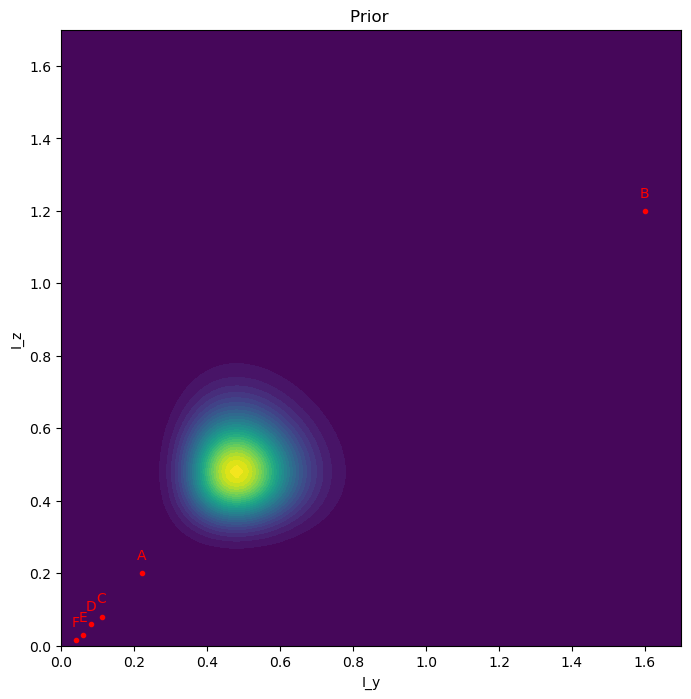

In [7]:
# Define the mean and covariance matrix
mean = np.array([0.5, 0.5])
std = np.array([0.1,0.1])

alpha = mean**2/std**2
beta = mean/std**2

gamma_I_y = gamma(a=alpha[0], scale = 1/beta[0])
gamma_I_z = gamma(a=alpha[0], scale = 1/beta[0])


# Create a grid of points
x, y = np.meshgrid(np.linspace(0, 1.7, 100), np.linspace(0, 1.7, 100))
shape = x.shape

x = x.flatten()
print(x)
y = y.flatten()
P = []

for (x_point,y_point) in zip(x,y):
    P.append(gamma_I_y.pdf(x_point)*gamma_I_y.pdf(y_point))
    # Calculate the PDF (probability density function) values at each point in the grid
    
print(x)
x = np.reshape(x,shape)
y = np.reshape(y,shape)
P = np.reshape(P,shape)


# Create a contour plot
plt.figure(figsize=(8, 8))
plt.contourf(x, y, P, levels=30, cmap='viridis')
plt.xlabel('I_y')
plt.ylabel('I_z')
plt.title('Prior ')

I_y = [0.22, 1.6, 0.11, 0.08, 0.06, 0.04]
I_z = [0.2, 1.2, 0.08, 0.06, 0.03, 0.016]
labels = ['A','B','C','D','E','F']

plt.plot(I_y,I_z,'.r')

# zip joins x and y coordinates in pairs
for i, (I_y_point,I_z_point) in enumerate(zip(I_y,I_z)):

    label = labels[i]

    plt.annotate(label, # this is the text
                 (I_y_point,I_z_point), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                 color = 'r') # horizontal alignment can be left, right or center

plt.show()